<a href="https://colab.research.google.com/github/Harshitprajapati10/uidai-aadhaar-trends-analysis/blob/main/enrollment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unlocking Societal Trends in Aadhaar Enrolment and Updates

## Objective
Analyze Aadhaar enrolment and update patterns across districts, age groups, and time
to identify societal trends, regional disparities, and operational insights for UIDAI.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = [
    "api_data_aadhar_enrolment_0_500000.csv",
    "api_data_aadhar_enrolment_500000_1000000.csv",
    "api_data_aadhar_enrolment_1000000_1006029.csv"
]

df = pd.concat(
    [pd.read_csv(f) for f in files],
    ignore_index=True
)
# df = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
# df = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
# df = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")
print(df.shape)
df.head()


(1006029, 7)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [3]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [5]:
import geopandas as gpd

india_map = gpd.read_file("DISTRICT_BOUNDARY.shp")

print(india_map.columns)
india_map.head()



Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry
0,MORBI,GUJAR>T,None,24,673,539476.764723,4.791280e+09,"POLYGON ((3108952.09 3942577.01, 3109009.987 3..."
1,AHMAD>B>D,GUJAR>T,None,24,438,857254.094647,6.966374e+09,"POLYGON ((3193648.356 3920619.089, 3193646.392..."
2,>NAND,GUJAR>T,None,24,440,393046.690523,3.054307e+09,"POLYGON ((3297696.184 3879979.348, 3297775.311..."
3,DEVBHUMI DW>RKA,GUJAR>T,None,24,674,661732.986530,4.002784e+09,"MULTIPOLYGON (((2924145.687 3865429.524, 29241..."
4,J>MNAGAR,GUJAR>T,None,24,447,737428.071884,5.694271e+09,"MULTIPOLYGON (((3044918.968 3859136.847, 30448..."


### Plotting data on india map

In [12]:
# create total population
df['total_population'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

# aggregate district-wise across India
district_data = (
    df
    .groupby(['state', 'district'], as_index=False)
    .agg({'total_population': 'sum'})
)


In [7]:
# shapefile normalization
india_map['state'] = (
    india_map['STATE']
    .str.lower()
    .str.strip()
)

india_map['district'] = (
    india_map['District']
    .str.lower()
    .str.strip()
)



In [8]:
df['state'] = (
    df['state']
    .str.lower()
    .str.strip()
)

df['district'] = (
    df['district']
    .str.lower()
    .str.strip()
)


In [9]:
df['total_population'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

district_data = (
    df
    .groupby(['state', 'district'], as_index=False)
    .agg({'total_population': 'sum'})
)


In [10]:
india_geo = india_map.merge(
    district_data,
    on=['state', 'district'],
    how='left'
)


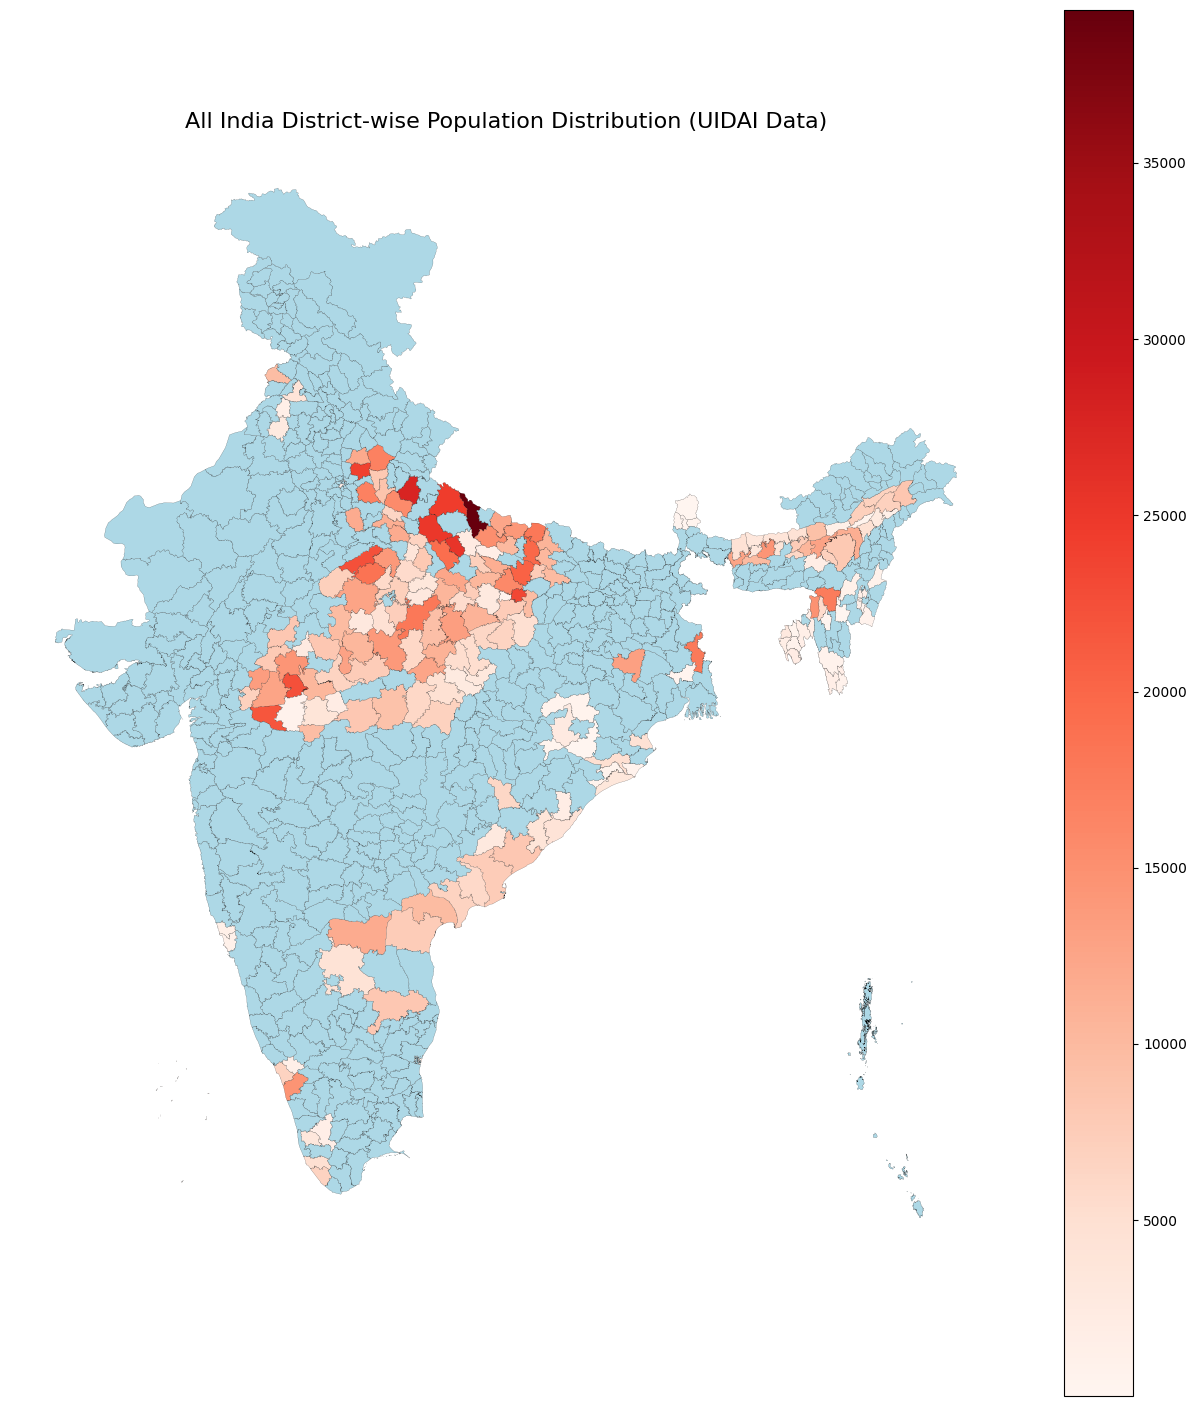

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 18))

india_geo.plot(
    column='total_population',
    cmap='Reds',                   # light → dark RED
    legend=True,
    linewidth=0.1,
    edgecolor='black',
    ax=ax,
    missing_kwds={
        "color": "lightblue",      # 🔵 districts NOT present
        "edgecolor": "black",
        "label": "No Data"
    }
)

ax.set_title(
    "All India District-wise Population Distribution (UIDAI Data)",
    fontsize=16
)

ax.axis('off')
plt.show()


### Age wise distribution

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date              1006029 non-null  object
 1   state             1006029 non-null  object
 2   district          1006029 non-null  object
 3   pincode           1006029 non-null  int64 
 4   age_0_5           1006029 non-null  int64 
 5   age_5_17          1006029 non-null  int64 
 6   age_18_greater    1006029 non-null  int64 
 7   total_population  1006029 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 61.4+ MB


In [15]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df['total_enrolments'] = (
    df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
)


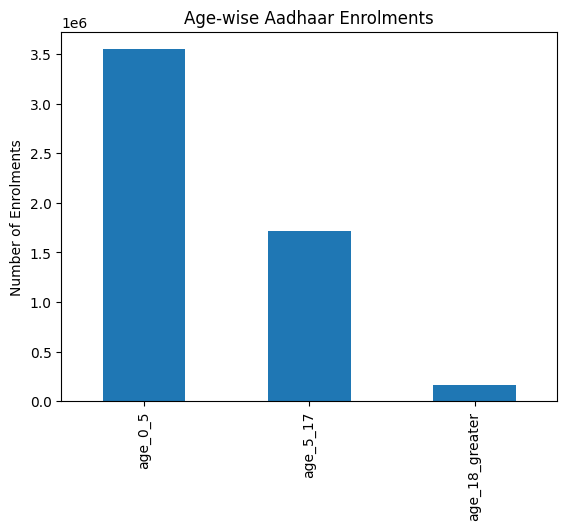

In [16]:
age_totals = df[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure()
age_totals.plot(kind='bar')
plt.title("Age-wise Aadhaar Enrolments")
plt.ylabel("Number of Enrolments")
plt.show()


### state wise distribution

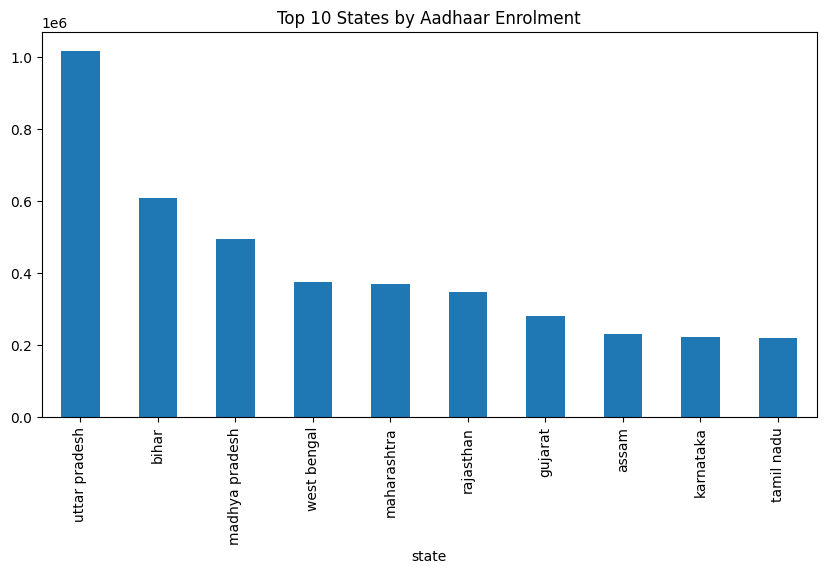

In [17]:
state_enrol = df.groupby('state')['total_enrolments'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
state_enrol.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolment")
plt.show()


### District wise enrollment

In [20]:
district_enrol = (
    df.groupby('district')['total_enrolments']
      .sum()
      .sort_values(ascending=False)
)
top10_districts = district_enrol.head(10)
top10_districts

,total_enrolments
district,
thane,43688
sitamarhi,42232
bahraich,39338
murshidabad,35911
south 24 parganas,33542
pune,31763
jaipur,31146
bengaluru,30980
sitapur,30854


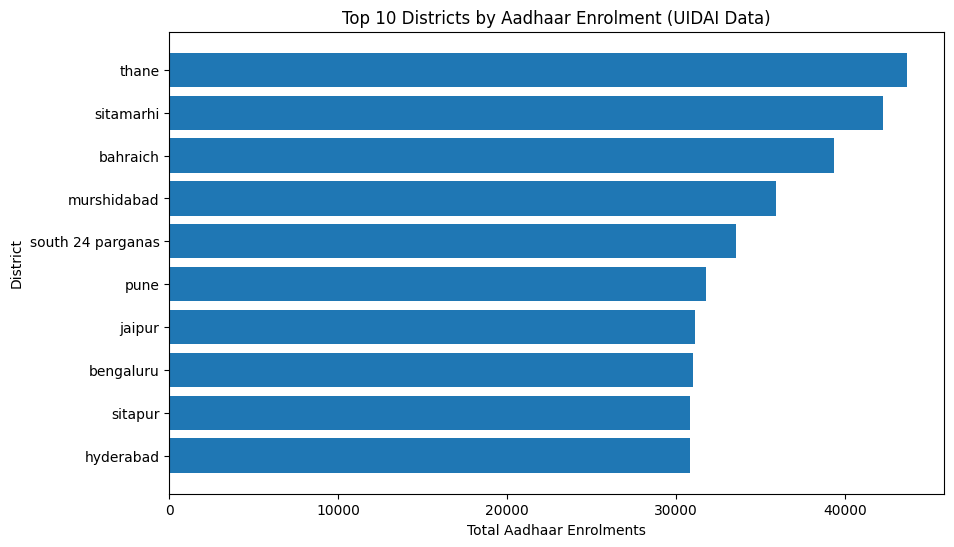

In [21]:
plt.figure(figsize=(10,6))
plt.barh(top10_districts.index, top10_districts.values)
plt.xlabel("Total Aadhaar Enrolments")
plt.ylabel("District")
plt.title("Top 10 Districts by Aadhaar Enrolment (UIDAI Data)")
plt.gca().invert_yaxis()  # Highest on top
plt.show()


### Time wise aadhar enrollment

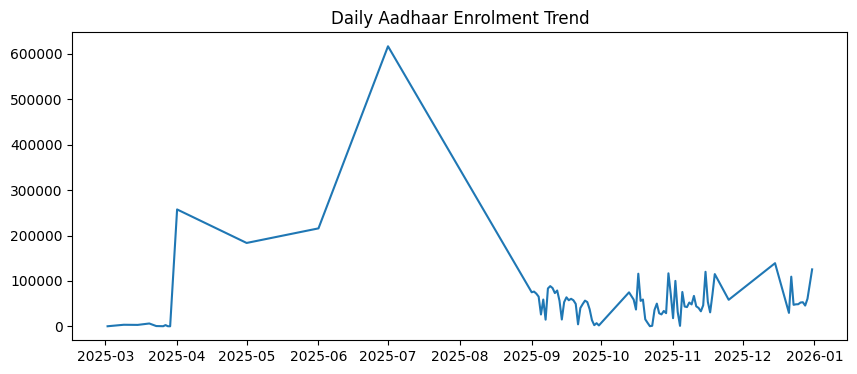

In [22]:
daily = df.groupby('date')['total_enrolments'].sum()

plt.figure(figsize=(10,4))
plt.plot(daily)
plt.title("Daily Aadhaar Enrolment Trend")
plt.show()


### Population v districtwise enrollment

In [28]:
pop_df = pd.read_csv("district_population.csv")
pop_df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


In [50]:
pop_df.columns = pop_df.columns.str.lower().str.replace('-', '_')
pop_df.rename(columns={
    'district': 'district',
    'state': 'state',
    'sex_ratio': 'sex_ratio'
}, inplace=True)
pop_df['district'] = pop_df['district'].str.strip().str.lower()
pop_df['state'] = pop_df['state'].str.strip().str.lower()

df['district'] = df['district'].str.strip().str.lower()
df['state'] = df['state'].str.strip().str.lower()
aadhaar_dist = (
    df.groupby(['state','district'])['total_enrolments']
      .sum()
      .reset_index()
)


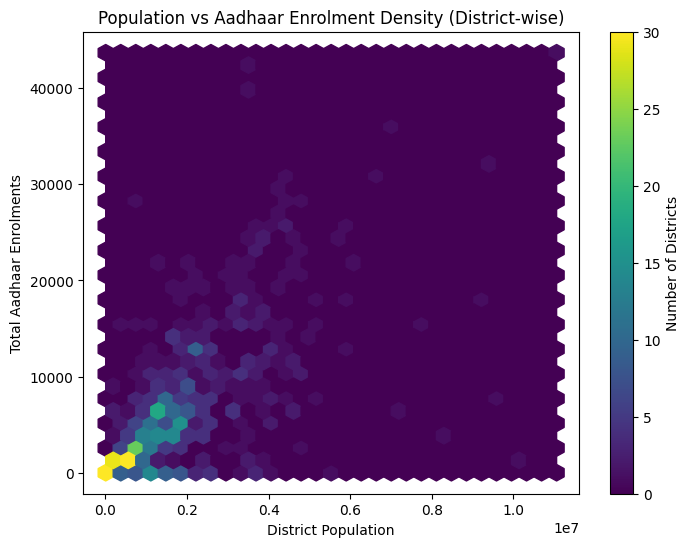

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(
    np.log1p(merged['population']),
    np.log1p(merged['total_enrolments']),
    alpha=0.6
)

plt.xlabel("Log(District Population)")
plt.ylabel("Log(Aadhaar Enrolments)")
plt.title("Log-Scaled Population vs Aadhaar Enrolment")
plt.show()


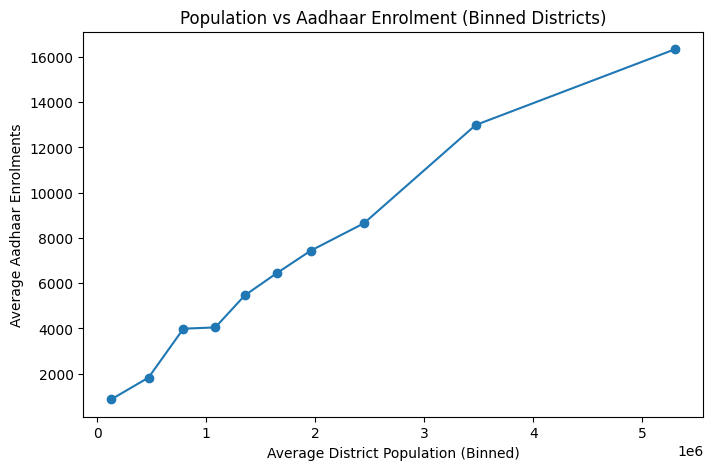

In [36]:
merged['pop_bin'] = pd.qcut(
    merged['population'],
    q=10,
    labels=False
)
bin_summary = (
    merged.groupby('pop_bin')
    .agg({
        'population': 'mean',
        'total_enrolments': 'mean'
    })
    .reset_index()
)
plt.figure(figsize=(8,5))
plt.plot(
    bin_summary['population'],
    bin_summary['total_enrolments'],
    marker='o'
)

plt.xlabel("Average District Population (Binned)")
plt.ylabel("Average Aadhaar Enrolments")
plt.title("Population vs Aadhaar Enrolment (Binned Districts)")
plt.show()


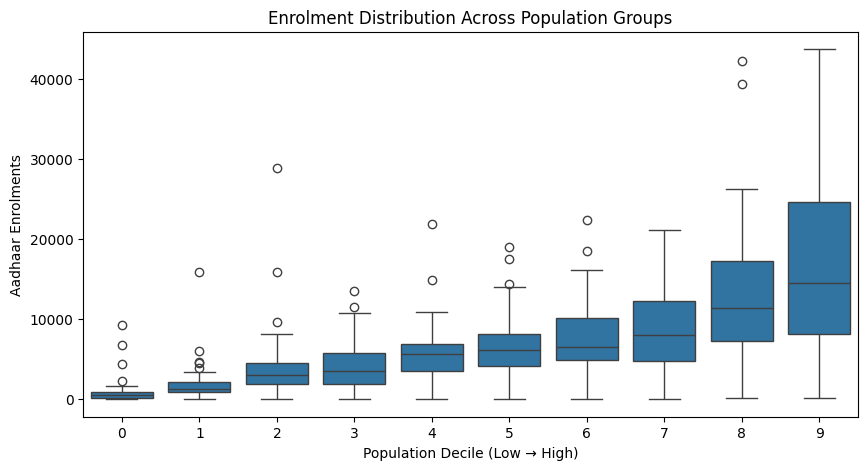

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='pop_bin',
    y='total_enrolments',
    data=merged
)

plt.xlabel("Population Decile (Low → High)")
plt.ylabel("Aadhaar Enrolments")
plt.title("Enrolment Distribution Across Population Groups")
plt.show()


Insight : *Higher population groups show not only higher enrolment medians but also greater
variance, indicating heterogeneous enrolment behavior.*

<Axes: >

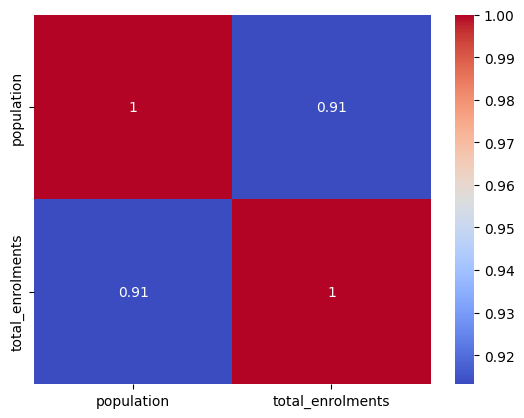

In [38]:
merged['enrolment_per_10k'] = (
    merged['total_enrolments'] / merged['population']
) * 10000
state_stats = (
    merged.groupby('state')
    .agg({
        'population':'sum',
        'total_enrolments':'sum'
    })
)

sns.heatmap(
    state_stats.corr(),
    annot=True,
    cmap="coolwarm"
)


### NORTH V SOUTH Analysis

In [42]:
north_states = [
    'uttar pradesh','bihar','jharkhand','west bengal',
    'rajasthan','madhya pradesh','chhattisgarh',
    'delhi','haryana','punjab','uttarakhand'
]

south_states = [
    'tamil nadu','karnataka','kerala',
    'andhra pradesh','telangana'
]

merged['region'] = merged['state'].apply(
    lambda x: 'North India' if x in north_states
    else ('South India' if x in south_states else 'Other')
)
ns_data = merged[merged['region'].isin(['North India','South India'])]


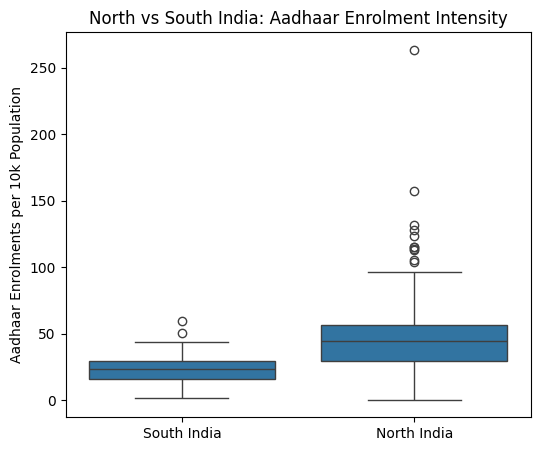

In [44]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x='region',
    y='enrolment_per_10k',
    data=ns_data
)

plt.xlabel("")
plt.ylabel("Aadhaar Enrolments per 10k Population")
plt.title("North vs South India: Aadhaar Enrolment Intensity")
plt.show()

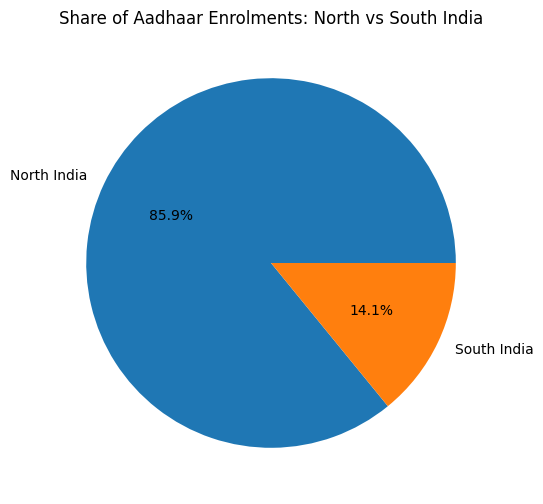

In [51]:
region_total = (
    ns_data.groupby('region')['total_enrolments']
    .sum()
)

region_total.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title("Share of Aadhaar Enrolments: North vs South India")
plt.ylabel("")
plt.show()


In [55]:
ns_data.groupby('region')['enrolment_per_10k'].describe()
from scipy.stats import ttest_ind

north = ns_data[ns_data['region']=='North India']['enrolment_per_10k']
south = ns_data[ns_data['region']=='South India']['enrolment_per_10k']

ttest_ind(north, south, equal_var=False)


TtestResult(statistic=np.float64(11.241320648741564), pvalue=np.float64(4.214154346966836e-25), df=np.float64(335.9238061886938))

Insight: “The North–South contrast in Aadhaar enrolment reflects India’s uneven demographic
transition, with the North still in an expansion phase and the South operating in a
maintenance and optimization phase.”